In [1]:
import geopandas as gpd
import matplotlib as plt
from shapely.geometry import Polygon

epsg:4326
     ID      AREA  ID1           F   F1  TAZID          F2           F3  \
0  1013  0.007098   52      »Ý¼ÃÇÅ  213   1013         NaN          NaN   
1     3  0.168142  135  ÌÒ»¨Îë½ÖµÀ    2      3  813.881539  2860.245349   
2     7  0.113220  728  ÌÒ»¨Îë½ÖµÀ    2      7   35.092412     0.000000   
3     1  0.175762  702  ÌÒ»¨Îë½ÖµÀ    1      1  666.224862  4197.960790   
4     4  0.057419  710  ÌÒ»¨Îë½ÖµÀ    2      4  154.102904  1920.770689   

          O     D        PCU_O        PCU_D     AMPCU_O     AMPCU_D  \
0  0.254547  None  2593.181396  2616.393555  660.087341  451.964294   
1  0.305664  None   573.577087   576.293274  175.321625   69.146957   
2  0.088905  None   182.653687   182.431183   16.238802   61.593304   
3  0.258013  None  1099.638916  1092.012207  283.721161  182.376099   
4  0.173041  None   994.368591   989.948303  172.066742  250.042496   

                                            geometry  
0  POLYGON ((120.59869 31.32574, 120.59789 31.326...  
1 

<AxesSubplot:>

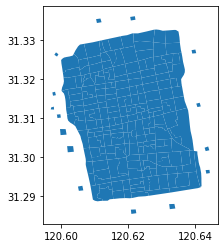

In [2]:
data = gpd.read_file(r'F:\苏州古城现有数据\古城taz\gcTaz 2022-02-28.shp')
print(data.crs)  # 查看数据对应的投影信息
print(data.head())  # 查看前5行数据
data.plot()
# plt.show()#简单展示

In [3]:
print(data["geometry"])

0      POLYGON ((120.59869 31.32574, 120.59789 31.326...
1      POLYGON ((120.60678 31.32899, 120.60683 31.329...
2      POLYGON ((120.60678 31.32899, 120.60780 31.325...
3      POLYGON ((120.60374 31.32649, 120.60488 31.325...
4      POLYGON ((120.60824 31.32349, 120.60847 31.322...
                             ...                        
218    POLYGON ((120.63923 31.32650, 120.63903 31.327...
219    POLYGON ((120.59773 31.31291, 120.59781 31.312...
220    POLYGON ((120.60981 31.29518, 120.61023 31.295...
221    POLYGON ((120.62703 31.29510, 120.62647 31.296...
222    POLYGON ((120.62121 31.31333, 120.62083 31.313...
Name: geometry, Length: 223, dtype: geometry


In [4]:
print(data["ID"])


0      1013
1         3
2         7
3         1
4         4
       ... 
218    1001
219    1011
220     138
221     187
222      64
Name: ID, Length: 223, dtype: int64


In [5]:
import pandas
from pandas.core.frame import DataFrame
id = []
polygon = []
for i in range(len(data["ID"])):
    id.append(data["ID"][i])
    polygon.append(data["geometry"][i])
j = {"id":id,"polygon":polygon}
df = DataFrame(j)
# print(df)
    

In [6]:
df.sort_values(by="id" , inplace=True, ascending=True) 
print(df)

       id                                            polygon
3       1  POLYGON ((120.603737 31.326494, 120.604877 31....
24      2  POLYGON ((120.600642 31.320383, 120.600604 31....
1       3  POLYGON ((120.606783 31.328993, 120.606828 31....
4       4  POLYGON ((120.60824 31.323493, 120.608473 31.3...
5       5  POLYGON ((120.608612 31.321482, 120.608497 31....
..    ...                                                ...
219  1011  POLYGON ((120.597733 31.312912, 120.59781 31.3...
178  1012  POLYGON ((120.597493 31.315714, 120.597298 31....
0    1013  POLYGON ((120.598693 31.325742, 120.597893 31....
215  1014  POLYGON ((120.610652 31.33433, 120.6104 31.335...
217  1015  POLYGON ((120.620823 31.334975, 120.620627 31....

[223 rows x 2 columns]


In [7]:
print(df["polygon"][0])

POLYGON ((120.598693 31.325742, 120.597893 31.326186, 120.598385 31.326807, 120.599114 31.326328, 120.598693 31.325742))


In [8]:
import sumolib
net = sumolib.net.readNet(r'F:\task\python实战\osm.net.xml')
nodes = net.getEdges()
# print(nodes)

In [11]:
import re
edge_id = [] 
node1 = []
node2 = []
for n in range(len(nodes)):
    str1 = str(nodes[n])
    t =re.findall(r'"(.+?)"',str1)
    edge_id.append(t[0])
    node1.append(t[1])
    node2.append(t[2])
# print(edge_id)
# print(node1)
# print(node2)

In [17]:
import xml.etree.ElementTree as ET
tree = ET.parse(r'F:\task\python实战\osm.net.xml')
root = tree.getroot()
edges = root.findall("edge")
edge_foot = []
for edge in edges:
    try:
        type = edge.attrib["type"]
        if type == "highway.footway":
            a = edge.attrib["id"]
            edge_foot.append(a)
    except:
        pass
print(edge_foot)
# 这一步把edge中的footway都提取出来了，等下和edge_id筛选一下；
        

['117947961#0', '117947961#1', '117947962#0', '117947962#1', '117947963', '117947964#0', '117947964#1', '117947965', '117947967#0', '117947967#1', '117947967#2', '117947969#0', '117947969#1', '117947969#2', '117947972#0', '117947972#1', '117947973#0', '117947973#1', '117947973#2', '117947973#3', '117947976#0', '117947976#1', '117947977', '117947980#0', '117947980#1', '117947980#2', '117947980#3', '117947980#4', '117947980#5', '117947982', '117947984#0', '117947984#1', '117947986', '117947988#0', '117947988#1', '117947988#10', '117947988#11', '117947988#12', '117947988#2', '117947988#3', '117947988#4', '117947988#5', '117947988#6', '117947988#7', '117947988#8', '117947988#9', '117947989#0', '117947989#1', '117947989#10', '117947989#11', '117947989#12', '117947989#13', '117947989#2', '117947989#3', '117947989#4', '117947989#5', '117947989#6', '117947989#7', '117947989#8', '117947989#9', '117947990', '117947992', '133427854#0', '133427854#1', '133427859', '133427863#0', '133427863#1', '13

In [20]:
new_edge_id_list =[]
node1_list = []
node2_list = []

for ttt in range(len(edge_id)):
    if edge_id[ttt] in edge_foot:
        pass
    else:
        new_edge_id_list.append(edge_id[ttt])
        node1_list.append(node1[ttt])
        node2_list.append(node2[ttt])
# 这一步结束之后对于edge的type进行过一轮筛选了（剩下的部分都是可以走小汽车的edge了）

In [22]:
r = {"edge_id":new_edge_id_list,"node1":node1_list,"node2":node2_list}
net_df = DataFrame(r)
# print(net_df)
# net_df["node1"] = net_df["node1"].apply(lambda x : x )
xy1_lon = []
xy1_lat = []

for e in range(len(net_df["node1"])):
    node1_xy = net.getNode(net_df["node1"][e]).getCoord()
    # x = node1_xy[0]
    lon,lat = net.convertXY2LonLat(node1_xy[0],node1_xy[1])
    xy1_lon.append(lon)
    xy1_lat.append(lat)
    
net_df["node1_lon"] = xy1_lon
net_df["node1_lat"] = xy1_lat

xy2_lon = []
xy2_lat = []

for ee in range(len(net_df["node2"])):
    node2_xy = net.getNode(net_df["node2"][ee]).getCoord()
    # x = node1_xy[0]
    lon1,lat1 = net.convertXY2LonLat(node2_xy[0],node2_xy[1])
    xy2_lon.append(lon1)
    xy2_lat.append(lat1)
    
net_df["node2_lon"] = xy2_lon
net_df["node2_lat"] = xy2_lat

print(net_df)
# 默认sumo转换后的坐标系为WGS-84

           edge_id       node1                         node2   node1_lon  \
0         --gneE14      gneJ12                        gneJ27  120.614558   
1     --gneE14.233      gneJ27  cluster_430312151_4451401336  120.615312   
2       -112973821   653812660                     653812662  120.641132   
3     -112973829#0  3023685088                     430312133  120.610159   
4     -112973829#1   430312134                    3023685088  120.610234   
...            ...         ...                           ...         ...   
4662        gneE12       gneJ9                        gneJ10  120.619645   
4663        gneE13      gneJ11         cluster_gneJ12_gneJ13  120.615215   
4664        gneE16      gneJ12                        gneJ21  120.614558   
4665         gneE2       gneJ6                         gneJ7  120.610091   
4666         gneE9  4462260503         cluster_gneJ28_gneJ29  120.607146   

      node1_lat   node2_lon  node2_lat  
0     31.325431  120.615312  31.323432  
1    

In [26]:
import shapely.geometry
node1belong = []
node2belong = []
nan_num = 0
for x in range(len(net_df["edge_id"])):
    a = net_df["node1_lon"][x]
    b = net_df["node1_lat"][x]
    c = net_df["node2_lon"][x]
    d = net_df["node2_lat"][x]
    point = shapely.geometry.Point(a,b)
    point1 = shapely.geometry.Point(c,d)#本步骤用来获得符合polygon函数格式的points；
    v = len(node1belong)
    vv = len(node2belong)
    for y in range(len(df["id"])):
        xxx = point.within(df["polygon"].iloc[y])
        xxxx = point1.within(df["polygon"].iloc[y])
        if xxx == True:
            node1belong.append(df["id"][y])
        else:
            pass
        if xxxx == True:
            node2belong.append(df["id"][y])
        else:
            pass
        # 这一步是用来校核这个edge所对应的taz的名称，可能会出现由于edge超出taz范围的edge，但是这部分edge我们可抛弃（由于我们的研究范围为taz的范围）;
        # 其实这一部分我们也可以将没有匹配上的edge手动匹配到距离这些edge最近的taz上；
        # 到底是否需要进行匹配先不确定;
    v1 = len(node1belong)
    if v == v1 - 1:
        pass
    else:
        v2 = "NAN"
        node1belong.append(v2)
        nan_num = nan_num + 1
    vv1 = len(node2belong)
    if vv == vv1 - 1:
        pass
    else:
        node2belong.append(v2)
# 在这一步taz和edge的匹配中会出现NAN的值，原因是可能出现了在taz经纬度范围内的edge，这需要统计一下NAN的数量；
        # print(node1belong)
        # print(node2)
# print(node1belong)  
# print(node2belong)            
print(nan_num)
print(len(node1belong))
print(len(node2belong))  
print(len(net_df["edge_id"]))
net_df["node1_belong"] = node1belong
net_df["node2_belong"] = node2belong

# print(point.within(df["polygon"].iloc[0]))

299
4667
4667
4667


In [27]:
# print(net_df)
net_df = net_df.drop(net_df[net_df["node1_belong"]== "NAN"].index)
net_df = net_df.drop(net_df[net_df["node2_belong"]== "NAN"].index)
# df = df.drop(df[<some boolean condition>].index)
net_df = net_df.reset_index(drop=True)
print(net_df)

           edge_id                          node1  \
0         --gneE14                         gneJ12   
1     --gneE14.233                         gneJ27   
2     -112973829#0                     3023685088   
3     -112973829#1                      430312134   
4     -112973829#2  cluster_4463418355_7500042921   
...            ...                            ...   
4350        gneE12                          gneJ9   
4351        gneE13                         gneJ11   
4352        gneE16                         gneJ12   
4353         gneE2                          gneJ6   
4354         gneE9                     4462260503   

                             node2   node1_lon  node1_lat   node2_lon  \
0                           gneJ27  120.614558  31.325431  120.615312   
1     cluster_430312151_4451401336  120.615312  31.323432  120.615440   
2                        430312133  120.610159  31.317816  120.610053   
3                       3023685088  120.610234  31.317293  120.610159  

In [28]:
taz_belong = []
def polygon_particle(x):
    a = x.centroid
    b = str(a)
    p1 = re.compile(r'[(](.*?)[)]', re.S)
    c = re.findall(p1, b)
    d = str(c).split(" ")
    e = d[0].strip("['")
    f = d[1].strip("']")
    return float(e),float(f)


def medium_xy(lon,lat,lon1,lat1):
    x = (lon1 - lon)/2 
    y = (lat1 - lat)/2
    xx = lon + x
    yy = lat + y
    return float(xx),float(yy)

import math
def get_distance(lat_1, lng_1, lat_2, lng_2): 
    d_lat = lat_2 - lat_1
    d_lng = lng_2 - lng_1 

    temp = (math.sin(d_lat / 2) ** 2 
       + math.cos(lat_1) 
       * math.cos(lat_2) 
       * math.sin(d_lng / 2) ** 2
    )

    return 6373.0 * (2 * math.atan2(math.sqrt(temp), math.sqrt(1 - temp)))

# a = medium_xy(120,100,121,102)  
# point = shapely.geometry.Point(a[0],a[1])
# print(point.within(df["polygon"].iloc[0]))

for mm in range(len(net_df["edge_id"])):
    if net_df["node1_belong"][mm] == net_df["node2_belong"][mm]:
        taz_belong.append(net_df["node2_belong"][mm])
    else:
        d = medium_xy(net_df["node1_lon"][mm],net_df["node1_lat"][mm],net_df["node2_lon"][mm],net_df["node2_lat"][mm])
        # print(d[0])
        # point2 = shapely.geometry.Point(d[0],d[1])
        node1_belongs = net_df["node1_belong"][mm]
        node2_belongs = net_df["node2_belong"][mm]
        
# a = df[(df.BoolCol==3)&(df.attr==22)].index.tolist()
        a = df[df.id == node1_belongs].index.tolist()   
        aa = str(a)[1:-1]
        aaa = int(aa)
        # print(df["polygon"][aaa])
        # print(df["id"][a])
        b = df[df.id == node2_belongs].index.tolist()   
        bb = str(b)[1:-1]
        bbb = int(bb)
        # print(df["polygon"][b])
        # print(type(str(df["polygon"].loc[(df["id"] == node1_belongs)])))
        # label = labels.loc[labels[‘id’]==index]
        polygon_xy1 =polygon_particle(df["polygon"][aaa])
        x1 = polygon_xy1[0]
        y1 = polygon_xy1[1]
        polygon_xy2 =polygon_particle(df["polygon"][bbb])
        x2 = polygon_xy2[0]
        y2 = polygon_xy2[1]
        dist1 = get_distance(d[0],d[1],x1,y1)
        dist2 = get_distance(d[0],d[1],x2,y2)
        if dist1 < dist2:
            taz_belong.append(net_df["node1_belong"][mm])
        else:
            taz_belong.append(net_df["node2_belong"][mm])
        # 这个步骤是对于两个端点分别属于两个交通小区的情况,进行taz的判定(主要原则是通过获取两个端点的中点,同时计算中点到相应taz质心的距离远近)
# print(taz_belong)
# print(len(taz_belong))
# net_df["taz_belong"] = taz_belong
new_edge_id = []
for mmm in range(len(net_df["edge_id"])):
    new_edge_id.append(net_df["edge_id"][mmm])
    

In [29]:
# new_taz_belong = []
# for m in taz_belong:
#     taz = "taz_" + str(m)
#     new_taz_belong.append(taz)
p = {"edge_id":new_edge_id,"taz_belong":taz_belong}
df1 = DataFrame(p)
print(df1)

           edge_id  taz_belong
0         --gneE14          31
1     --gneE14.233          31
2     -112973829#0          80
3     -112973829#1          66
4     -112973829#2          66
...            ...         ...
4350        gneE12         121
4351        gneE13         128
4352        gneE16          22
4353         gneE2         179
4354         gneE9           7

[4355 rows x 2 columns]


In [32]:
a = set(taz_belong)
b = list(a)
# print(type(b[0]))
taz_total = []
for ii in range(len(b)):
    taz_list = []
    for iii in range(len(df1["taz_belong"])):
        # taz_list = []
        if df1["taz_belong"][iii] == b[ii]:
            taz_list.append(df1["edge_id"][iii])
    taz_total.append(taz_list)
# print(taz_total)
# print(len(taz_total))

l = {"taz":b,"edges":taz_total}
df3 = DataFrame(l)
print(df3)

      taz                                              edges
0       1  [-298460109#0, -298460192#0, -298460192#1, -29...
1       2  [-316161559, -316161632#0, -316161635#1, -3161...
2       3  [-298460109#1, -298460109#3, -44669544#5, -449...
3       4  [-133427884, -298460193, -36999940#0, -3699994...
4       5  [-298460192#5, -525823881#2, -525823881#3, -52...
..    ...                                                ...
198  1008  [-315108612#0, -315108612#1, -315108612#2, -45...
199  1009  [-460195885#1, -460195885#2, -460195885#3, -46...
200  1010  [-454323125, -454323233, -454323252#1, -454323...
201  1012              [-620937810#0, -621257559, 621257559]
202  1013  [-316161754#2, -44669544#1, -44669544#2, -4466...

[203 rows x 2 columns]


In [36]:
taz_edge_num = []
for each in range(len(df3["taz"])):
    n = len(df3["edges"][each])
    taz_edge_num.append(n)
# print(taz_edge_num)
df3["taz_edge_num"] = taz_edge_num
print(df3)
df3.to_csv('交通小区划分.csv',encoding='utf-8-sig')
# 这部分生成的csv会发现,仍然会存在部分taz中只包含一条edge的情况;针对这个情况不知道是否需要做修改;

      taz                                              edges  taz_edge_num
0       1  [-298460109#0, -298460192#0, -298460192#1, -29...            45
1       2  [-316161559, -316161632#0, -316161635#1, -3161...            26
2       3  [-298460109#1, -298460109#3, -44669544#5, -449...            40
3       4  [-133427884, -298460193, -36999940#0, -3699994...            24
4       5  [-298460192#5, -525823881#2, -525823881#3, -52...            18
..    ...                                                ...           ...
198  1008  [-315108612#0, -315108612#1, -315108612#2, -45...            16
199  1009  [-460195885#1, -460195885#2, -460195885#3, -46...           108
200  1010  [-454323125, -454323233, -454323252#1, -454323...            11
201  1012              [-620937810#0, -621257559, 621257559]             3
202  1013  [-316161754#2, -44669544#1, -44669544#2, -4466...            70

[203 rows x 3 columns]


In [142]:
import xml.etree.ElementTree as ET
with open(r'F:\苏州古城现有数据\古城taz\od.taz.xml', "w", encoding='utf8') as tazfiles:
    print("<tazs>", file=tazfiles)
    for d in range(len(df3["taz"])):
        id = df3["taz"][d]
        print('    <taz id="%s">' %id,file=tazfiles)
        for dd in range(len(df3["edges"][d])):
            # print(df3["edges"][dd])
            print('        <tazSource id="%s" weight="100"/>' % df3["edges"][d][dd], file=tazfiles)
            print('        <tazSink id="%s" weight="100"/>' % df3["edges"][d][dd], file=tazfiles)
        print('    </taz>', file=tazfiles)
    print("</tazs>", file=tazfiles)